# Cai-XiaoYi task2

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('REGRES.txt', sep='\s+', names=['air_speed', 'temperature', 'acid_concentration', 'loss_of_ammonia'])

In [3]:
df.head()

,air_speed,temperature,acid_concentration,loss_of_ammonia
0,80.0,27.0,89.0,42.0
1,80.0,27.0,88.0,37.0
2,75.0,25.0,90.0,37.0
3,62.0,24.0,87.0,28.0
4,62.0,22.0,87.0,18.0


In [4]:
y = df.loss_of_ammonia

In [5]:
X = df.drop(columns = ['loss_of_ammonia'])

In [6]:
from sklearn import linear_model

## Set the set of regularization factors

In [7]:
lasso = linear_model.Lasso()
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20,50]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
X_test

,air_speed,temperature,acid_concentration
0,80.0,27.0,89.0
17,50.0,19.0,79.0
15,50.0,18.0,86.0
1,80.0,27.0,88.0
8,58.0,23.0,87.0


## Build lasso model

In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## trainloss and testloss are close, so that the alpha is best. The proof of no overfitting allows the model to achieve good generalisation and more robustness.

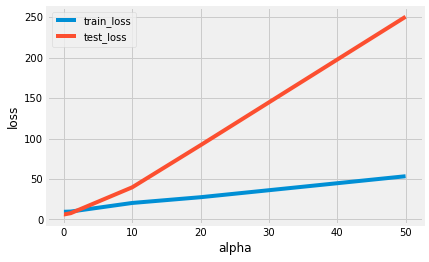

In [10]:
train_loss = []
test_loss = []
for i in Cs:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    train_pred = lasso.predict(X_train)

    mse_train= mean_squared_error(y_train, train_pred)
    mse_test= mean_squared_error(y_test, y_pred)
    test_loss.append(mse_test)
    train_loss.append(mse_train)
        

plt.style.use('fivethirtyeight')
plt.plot(Cs,train_loss, label = 'train_loss')
plt.plot(Cs,test_loss, label = 'test_loss')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('loss')
plt.show()

## Selecting the appropriate regularised fraction。Note the overly high regularisation factor, lasso will regularise all coefficients of the independent variables to zero.

In [11]:
lasso = linear_model.Lasso(alpha=3)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

## Building the ridge model

In [12]:
Cvs = [1, 10, 20, 50, 60, 65, 68, 69, 70]

In [13]:
from sklearn.linear_model import Ridge
train_loss = []
test_loss = []
for i in Cvs:
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    train_pred = ridge.predict(X_train)

    mse_train= mean_squared_error(y_train, train_pred)
    mse_test= mean_squared_error(y_test, y_pred)
    test_loss.append(mse_test)
    train_loss.append(mse_train)

## We can see that testloss and trainloss are getting closer and closer, which is the effect of regularisation.

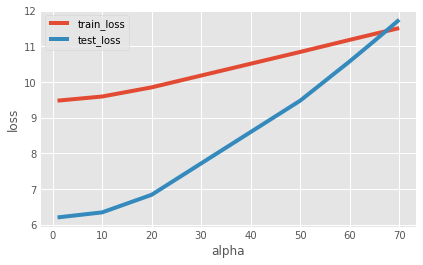

In [14]:
plt.style.use('ggplot')
plt.plot(Cvs,train_loss, label = 'train_loss')
plt.plot(Cvs,test_loss, label = 'test_loss')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('loss')
plt.show()

In [15]:
ridge = linear_model.Ridge(alpha=68)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [16]:
ridge_coef = ridge.coef_

In [17]:
ridge_coef

array([ 0.67988607,  0.77734788, -0.04436864])

In [18]:
ridge_intercept = ridge.intercept_

In [19]:
ridge_intercept

-36.37232933450913

In [30]:
pred_loss = 0
for i,j  in zip(ridge_coef, X.iloc[3]):
    pred_loss += i*j
     
pred_loss += ridge_intercept
print('Day 4 loss_of_ammonia =',pred_loss )

Day 4 loss_of_ammonia = 20.576884030768568


$$0.67988607 * air_speed + 0.77734788* temperature -0.04436864* acid_concentration -36.37232933450913=loss_of_ammonia$$

$$0.67988607 * 62.0 + 0.77734788* 24.0 -0.04436864* 87.0 -36.37232933450913=loss_of_ammonia$$

## We did a point estimate for day 4 by coefficients based on the day 4 independent variable data

In [32]:
lasso_coef = lasso.coef_

## As can be seen from the previous task analysis, the third variable is not highly correlated with the other two independent and dependent variables, so it is discarded when the regularisation is done.If the regularization factor continues to be adjusted upwards, the coefficient of the second, more weakly correlated variable will also become zero


In [33]:
lasso_coef

array([ 0.63837203,  0.84845016, -0.        ])

In [34]:
lasso_intercept = lasso.intercept_

In [35]:
lasso_intercept

-39.2019937529634

In [36]:
pred_loss = 0
for i,j  in zip(lasso_coef, X.iloc[3]):
    pred_loss += i*j
     
pred_loss += lasso_intercept
print('Day 4 loss_of_ammonia =',pred_loss )

Day 4 loss_of_ammonia = 20.73987575451747


**Thank you for taking the time to read my reports, although they are not perfect. If you would like, please let me know what is lacking and I will improve them.**